<a href="https://colab.research.google.com/github/Jhonatan1599/Fault_diagnosis/blob/fault/Red_Neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers, models



In [ ]:
data = pd.read_excel('./data_01.xlsx', index_col=0)
data

In [ ]:
input_cols = ['MAF', 'velocidad_motor', 'masa_combustible_inyectado']
output_cols = ['MAP']

In [ ]:
X = data[input_cols].values
y = data[output_cols].values

In [ ]:
# Normalizar los datos
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


In [ ]:
# Crear el modelo de red neuronal
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# Entrenar el modelo
#model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

# Entrenar el modelo y guardar el historial de entrenamiento
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

# Obtener la pérdida en el conjunto de entrenamiento y prueba
loss_train = history.history['loss']
loss_val = history.history['val_loss']



Epoch 1/100
1804/1804 [==============================] - 8s 3ms/step - loss: 0.0018 - val_loss: 4.2337e-04
Epoch 2/100
1804/1804 [==============================] - 5s 3ms/step - loss: 2.8590e-04 - val_loss: 2.4253e-04
Epoch 3/100
1804/1804 [==============================] - 5s 3ms/step - loss: 2.6349e-04 - val_loss: 2.7633e-04
Epoch 4/100
1804/1804 [==============================] - 5s 3ms/step - loss: 2.5173e-04 - val_loss: 2.6164e-04
Epoch 5/100
1804/1804 [==============================] - 5s 3ms/step - loss: 2.4317e-04 - val_loss: 2.2405e-04
Epoch 6/100
1804/1804 [==============================] - 7s 4ms/step - loss: 2.4329e-04 - val_loss: 2.2613e-04
Epoch 7/100
1804/1804 [==============================] - 5s 3ms/step - loss: 2.3628e-04 - val_loss: 2.1785e-04
Epoch 8/100
1804/1804 [==============================] - 5s 3ms/step - loss: 2.3503e-04 - val_loss: 2.4738e-04
Epoch 9/100
1804/1804 [==============================] - 5s 3ms/step - loss: 2.3329e-04 - val_loss: 2.7831e-04
Epoch

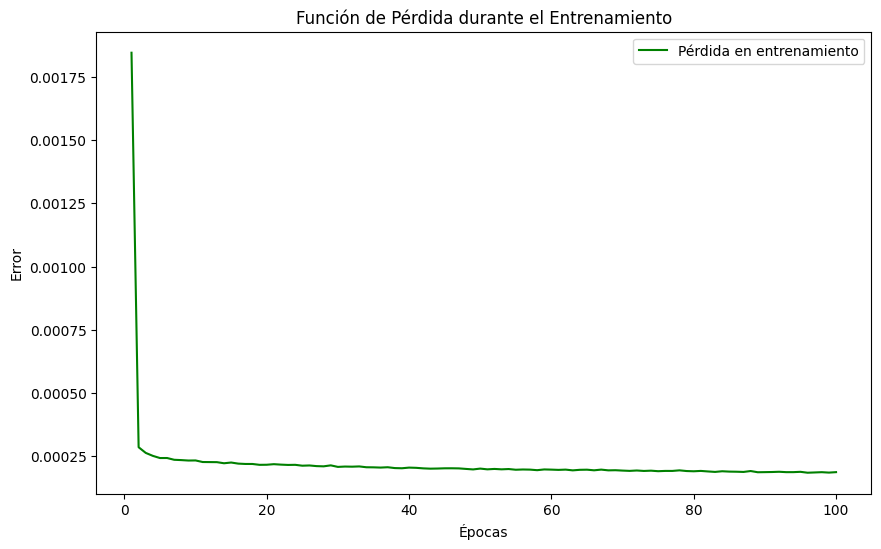

In [ ]:
# Crear la gráfica de la función de pérdida
epochs = range(1, len(loss_train) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss_train, 'g', label='Pérdida en entrenamiento')
plt.title('Función de Pérdida durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Error')
plt.legend()
plt.show()

In [ ]:
# Evaluar el modelo
loss = model.evaluate(X_test, y_test)
print(f'Loss en conjunto de prueba: {loss}')

226/226 [==============================] - 1s 2ms/step - loss: 1.9857e-04
Loss en conjunto de prueba: 0.00019856520520988852


In [ ]:
# Guardar el modelo
model.save("modelo_entrenado.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
